In [1]:
from scipy.optimize import curve_fit
import pandas as pd
import numpy as np
from uncertainties import ufloat
from bokeh.plotting import figure, show, output_file, save
import matplotlib.pyplot as plt

### Data from a file into a Padans dataframe

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html

In [3]:
data = pd.read_csv('./data_b.txt', sep=" ", header=None)
data.columns = ['Eneergia in eV','Conteggi']

In [4]:
display(data)

Eneergia in eV   Conteggi
0                0   0.366037
1                5   4.758470
2               10  11.042100
3               15  17.813800
4               20  24.646600
5               25  32.333400
6               30  41.667100
7               35  50.817800
8               40  65.885900
9               45  77.842900
10              50  85.956500
11              55  88.945700
12              60  86.017500
13              65  84.248300
14              70  84.736400
15              75  83.455300
16              80  79.246000
17              85  69.729200
18              90  66.313000
19              95  55.759200
20             100  45.205400
21             105  29.771100
22             110  20.437100
23             115  15.556600

In [5]:
data['sigmaConstPlusSqrt']=np.sqrt(data['Conteggi'])+0.05*data['Conteggi']

In [6]:
data['sigmaSqrt']=data['Conteggi'].apply(lambda elem: np.sqrt(elem) )#0.05*elem)

In [24]:
data['sigmaRelConst']=data['Conteggi'].apply(lambda elem: 0.05*elem)

In [23]:
data['sigmaConst']=0.06

In [25]:
data

Eneergia in eV   Conteggi  sigmaConstPlusSqrt  sigmaSqrt  sigmaRelConst  \
0                0   0.366037            0.623312   0.605010       0.018302   
1                5   4.758470            2.419315   2.181392       0.237924   
2               10  11.042100            3.875071   3.322966       0.552105   
3               15  17.813800            5.111330   4.220640       0.890690   
4               20  24.646600            6.196864   4.964534       1.232330   
5               25  32.333400            7.302917   5.686247       1.616670   
6               30  41.667100            8.538361   6.455006       2.083355   
7               35  50.817800            9.669550   7.128660       2.540890   
8               40  65.885900           11.411308   8.117013       3.294295   
9               45  77.842900           12.715007   8.822862       3.892145   
10              50  85.956500           13.569098   9.271273       4.297825   
11              55  88.945700           13.878388   9.431103       4.447285   
12              60  86.017500           13.575437   9.274562       4.300875   
13              65  84.248300           13.391102   9.178687       4.212415   
14              70  84.736400           13.442058   9.205238       4.236820   
15              75  83.455300           13.308152   9.135387       4.172765   
16              80  79.246000           12.864322   8.902022       3.962300   
17              85  69.729200           11.836861   8.350401       3.486460   
18              90  66.313000           11.458929   8.143279       3.315650   
19              95  55.759200           10.255168   7.467208       2.787960   
20             100  45.205400            8.983766   6.723496       2.260270   
21             105  29.771100            6.944845   5.456290       1.488555   
22             110  20.437100            5.542596   4.520741       1.021855   
23             115  15.556600            4.722016   3.944186       0.777830   

    sigmaConst  
0         0.06  
1         0.06  
2         0.06  
3         0.06  
4         0.06  
5         0.06  
6         0.06  
7         0.06  
8         0.06  
9         0.06  
10        0.06  
11        0.06  
12        0.06  
13        0.06  
14        0.06  
15        0.06  
16        0.06  
17        0.06  
18        0.06  
19        0.06  
20        0.06  
21        0.06  
22        0.06  
23        0.06

In [9]:
data.dtypes

Eneergia in eV          int64
Conteggi              float64
sigmaConstPlusSqrt    float64
sigmaSqrt             float64
sigmaRelConst         float64
dtype: object

### A simple fitting function which uses padandas as input data

https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

In [87]:
def fit_data(_func,_data,x='x',y='y',sigma='weights'\
             ,make_plot=True,p0=np.nan,bounds=(-np.inf,np.inf)):
    '''
    a simple exaple of fit function to which I pass data and the fitting function. This function assumes that the data is a Pandas dataframe and has columns named x,y and weights
    '''
    _x=_data[x]
    _y=_data[y]
    _sigma=_data[sigma]

    popt, pcov = curve_fit(_func, _x, _y,sigma=_sigma,absolute_sigma=True,p0=p0,bounds=bounds)
       
    f_x=_func(_x,*popt)
    residues=(f_x - _y)
    chi_square=np.sum(residues**2/(_sigma**2))
    #
    #lin=ufloat(popt[1],np.sqrt(pcov[1,1]))
    #const=ufloat(popt[0],np.sqrt(pcov[0,0]))
    #
    res={}
    res['Residui']=residues
    res['Par. Ottimali']=popt
    res['Covarianza']=pcov
    res['chi_square']=chi_square
    if make_plot:
        label="$\chi^2={chiq:.3g}$"
        title="{bf:.2f}"
        x_i_plot=np.linspace(min(_x),max(_x),num=100)
        f_x_i_plot=_func(x_i_plot,*popt)
        plt.plot(x_i_plot,f_x_i_plot,label=label.format(chiq=res['chi_square']))
        plt.errorbar(_x,_y,yerr=_sigma,fmt='o')
        #plt.title(title.format(bf=res['Par. Ottimali']))
        plt.legend()
    return res

/var/folders/8c/xf0bnntx7qs0c27zrpgdp68c0000gn/T/ipykernel_35831/3982192100.py:2: RuntimeWarning: divide by zero encountered in true_divide
  return np.exp(-w*(x/e + e/x))*N


68.92445501260408

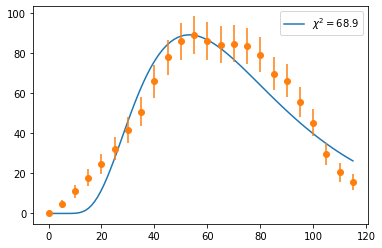

In [88]:
def _func(x, N, w,e):
    return np.exp(-w*(x/e + e/x))*N

my_res = fit_data(_func, data,x='Eneergia in eV',y='Conteggi'\
                      ,sigma='sigmaSqrt',p0=[1,1,60],make_plot=True)

#print(res)
my_res['chi_square']

In [145]:
from scipy.stats import norm
def gaussiana_scipy(x,N,mu,sigma):
    return N*norm.pdf(x,mu,sigma)

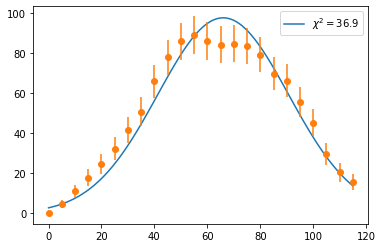

In [159]:
res = fit_data(gaussiana_scipy, data,x='Eneergia in eV',y='Conteggi'\
                      ,sigma='sigmaSqrt',p0=[60,66,100],bounds=(0,np.inf) )
pOptGaussinaScipy=res['Par. Ottimali']

In [227]:
try:
    del gaussiana
except:
    pass
def gaussiana(x,N,mu,sigma):
    return N*np.exp(-(x-mu)**2/(2*sigma**2))/(np.sqrt(2*np.pi)*sigma)

In [228]:
from scipy.integrate import quad

In [229]:
quad(gaussiana,-np.inf,np.inf,args=(100,11,1))

(100.00000000000001, 4.800487355646516e-07)

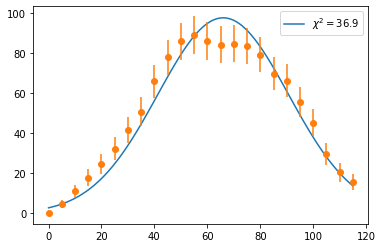

In [232]:
res = fit_data(gaussiana, data,x='Eneergia in eV',y='Conteggi'\
                      ,sigma='sigmaSqrt',p0=[60,66,100],bounds=(0,np.inf) )
pOptGaussina=res['Par. Ottimali']

In [233]:
pOptGaussina

array([6057.75729077,   65.98101716,   24.76051295])

In [234]:
quad(gaussiana,0,120,args=(pOptGaussina[0],pOptGaussina[1],pOptGaussina[2]))

(5946.176738545326, 7.86796657403637e-06)

In [ ]:
data['Eneergia in eV']#.diff()

0       0
1       5
2      10
3      15
4      20
5      25
6      30
7      35
8      40
9      45
10     50
11     55
12     60
13     65
14     70
15     75
16     80
17     85
18     90
19     95
20    100
21    105
22    110
23    115
Name: Eneergia in eV, dtype: int64

In [200]:
np.sum(data['Conteggi'])*5

6112.757035

In [3]:
# example of list comprehension
_l=[np.nan,1,2,3]
[ el for el in _l if el==el ] 

[1, 2, 3]

#### Display of some replicas

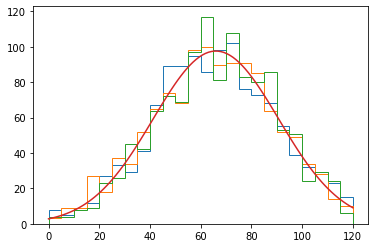

In [241]:
measurements=1222
bins=np.linspace(0,120,num=25)
density=False
observations1 = norm.rvs(loc=pOptGaussina[1]\
                        , scale=pOptGaussina[2]\
                        , size=measurements, random_state=None)
plt.hist(observations1,density=density,histtype='step',bins=bins)
observations2 = norm.rvs(loc=pOptGaussina[1]\
                        , scale=pOptGaussina[2]\
                        , size=measurements, random_state=None)
plt.hist(observations2,density=density,histtype='step',bins=bins)
observations3 = norm.rvs(loc=pOptGaussina[1]\
                        , scale=pOptGaussina[2]\
                        , size=measurements, random_state=None)
plt.hist(observations3,density=density,histtype='step',bins=bins)

x_i=np.linspace(0,120,num=100)
y_i=gaussiana(x_i,pOptGaussina[0],pOptGaussina[1],pOptGaussina[2])
#y_i=measurements*norm.pdf(x_i,pOptGaussinaScipy[1],pOptGaussinaScipy[2])
plt.plot(x_i,y_i)

In [266]:
try:
    del average_pairs_array
except:
    pass

def average_pairs_array(_bins:np.array):
    '''
        produce il punto medio di ciascuna coppia consecutiva in un array
        p.es. per una lista di bin [0,5,10] --> [2.5,7.5]
    '''
    return (_bins[:-1]+_bins[1:])/2

In [271]:
?fit_data

Signature:
fit_data(
    _func,
    _data,
    x='x',
    y='y',
    sigma='weights',
    make_plot=True,
    p0=nan,
    bounds=(-inf, inf),
)
Docstring: a simple exaple of fit function to which I pass data and the fitting function. This function assumes that the data is a Pandas dataframe and has columns named x,y and weights
File:      /var/folders/8c/xf0bnntx7qs0c27zrpgdp68c0000gn/T/ipykernel_35831/584171097.py
Type:      function


#### Make replicas

In [322]:
def one_replica(measurements=1222,plot_replica=False,plot_pdf=False,\
                density=False,pOpt=pOptGaussina):
    
    bins=np.linspace(0,120,num=25)

    observations1 = norm.rvs(loc=pOpt[1]\
                            , scale=pOpt[2]\
                            , size=measurements, random_state=None)
    if plot_replica:
        _counts, _bins, _patches  = plt.hist(observations1,density=density,\
                                         histtype='step',bins=bins,label='replica')
    else:
        _counts, _bins  = np.histogram(observations1,density=density,\
                                         bins=bins)
        
    if plot_pdf:
        x_i=np.linspace(0,120,num=100)
        y_i=gaussiana(x_i,pOpt[0],pOpt[1],pOpt[2])
        plt.plot(x_i,y_i,label='pdf from real exp')

    _data = pd.DataFrame(np.transpose(np.array([
    average_pairs_array(_bins),
    _counts
    ]))
    )
    _data.columns=['x','Y']
    _data['sigma']=np.sqrt(_data["Y"])
    res=fit_data(gaussiana,_data,x='x',y='Y',sigma='sigma',p0=pOpt,make_plot=False)
    return res


In [316]:
a_chiq=[ one_replica()['chi_square'] for i in np.arange(100) ]

/Users/roberto/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:756: RuntimeWarning: divide by zero encountered in true_divide
  transform = 1.0 / sigma
/Users/roberto/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


(array([ 0.,  0.,  0.,  0.,  3.,  8., 17., 18., 14.,  7., 13.,  7.,  4.,
         1.,  3.,  1.,  3.,  0.,  0.,  0.]),
 array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. , 22.5, 25. ,
        27.5, 30. , 32.5, 35. , 37.5, 40. , 42.5, 45. , 47.5, 50. ]),
 <BarContainer object of 20 artists>)

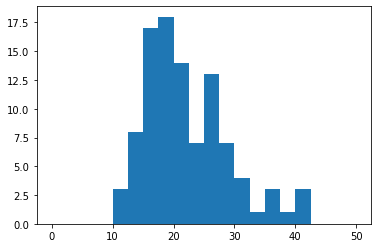

In [321]:
plt.hist(a_chiq,bins=np.linspace(0,50,num=21))

### Other functions

In [56]:
def _func2(x, N, w,e,N1, w1,e1):
    return np.exp(-w*(x/e + e/x))*N + np.exp(-w1*(x/e1 + e1/x))*N1

res = fit_data(_func2, data,x='Eneergia in eV',y='Conteggi'\
                      ,sigma='sigmaSqrt',p0=[100,1,80,100,1,67],bounds=(0,np.inf) )

RuntimeError: Optimal parameters not found: The maximum number of function evaluations is exceeded.

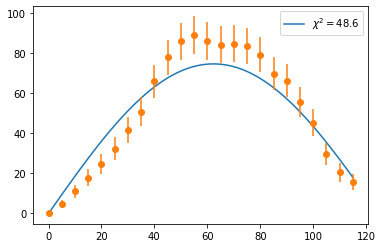

In [54]:
def _funcSin(x, omega, A):
    return np.sin(omega*x)*A 

res = fit_data(_funcSin, data,x='Eneergia in eV',y='Conteggi'\
                      ,sigma='sigmaSqrt',p0=[1/60,100],bounds=(0,np.inf) )

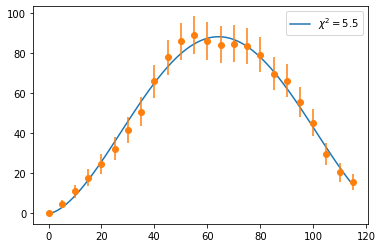

In [55]:
def _funcSinN(x, omega, A,n):
    return np.power(np.sin(omega*x),n)*A 

res = fit_data(_funcSinN, data,x='Eneergia in eV',y='Conteggi'\
                      ,sigma='sigmaSqrt',p0=[1/60,100,1],bounds=(0,np.inf) )

### Plotting with Bookeh

https://bokeh.pydata.org/en/latest/

https://bokeh.pydata.org/en/latest/docs/gallery.html

In [47]:
x = np.linspace(5, 120, 120)
y = _func(x,popt[0],popt[1],popt[2])
y = _func(x,popt[0],popt[1],popt[2])

TOOLS = "pan,wheel_zoom,box_zoom,reset,save,box_select"

p1 = figure(title="Plot Example", tools=TOOLS)
p1.circle(data['Eneergia in eV'], data['Conteggi'], legend="Data",color="orange")
p1.line(x, y, legend="function(x)")

output_file("legend.html", title="legend.py example")

save(p1)  # open a browser

'/Users/roberto/cernbox/Working/Teaching/Monte Carlo/Lezioni/legend.html'

In [50]:
x = np.linspace(5, 120, 120)
y = _func(x,popt[0],popt[1],popt[2])
y = _func(x,popt[0],popt[1],popt[2])

TOOLS = "pan,wheel_zoom,box_zoom,reset,save,box_select"

p1 = figure(title="Plot Example", tools=TOOLS)
p1.circle(data['Eneergia in eV'], data['Conteggi'], legend="Data",color="orange")
p1.line(x, y, legend="function(x)")

show(p1)
#output_file("legend.html", title="legend.py example")
#save(p1)  # open a browser

In [49]:
x = np.linspace(5, 120, 120)
y = _func2(x,popt[0],popt[1],popt[2],popt[3],popt[4],popt[5])


TOOLS = "pan,wheel_zoom,box_zoom,reset,save,box_select"

p1 = figure(title="Plot Example", tools=TOOLS)
p1.circle(data['x'], data['y'], legend="Data",color="orange")
p1.line(x, y, legend="sin(x)")

output_file("legend2.html", title="legend.py example")

save(p1)  # open a browser

IndexError: index 3 is out of bounds for axis 0 with size 3

In [179]:
popt

array([  5.25809962e-02,   5.70577479e-01,   2.28190149e+01,
         7.30755630e+01,   3.47908362e+00,   5.84910518e+01])

In [178]:
pcov

array([[  5.85354353e-03,   7.06193105e-02,  -1.99748387e+00,
         -1.68031296e+01,  -1.27781971e-01,   8.52044496e-02],
       [  7.06193105e-02,   8.75316564e-01,  -2.52795923e+01,
         -2.16615829e+02,  -1.64466737e+00,   8.88380236e-01],
       [ -1.99748387e+00,  -2.52795923e+01,   7.47813392e+02,
          6.45687043e+03,   4.89779409e+01,  -2.22459415e+01],
       [ -1.68031296e+01,  -2.16615829e+02,   6.45687043e+03,
          6.46481361e+04,   4.80434465e+02,  -6.34962338e+01],
       [ -1.27781971e-01,  -1.64466737e+00,   4.89779409e+01,
          4.80434465e+02,   3.58215265e+00,  -5.77494305e-01],
       [  8.52044496e-02,   8.88380236e-01,  -2.22459415e+01,
         -6.34962338e+01,  -5.77494305e-01,   6.70322622e+00]])

### Plotting with Matplotlib

https://matplotlib.org/gallery/index.html

https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot

https://matplotlib.org/api/_as_gen/matplotlib.pyplot.errorbar.html?highlight=errorbar#matplotlib.pyplot.errorbar   

https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html

In [45]:
v=np.array([2,3])

In [52]:
try:
    v[3]
except IndexError:
    print("errore di indice")
except NameError:
    print("name error")

errore di indice


In [2]:
try:
    del gaussiana
except:
    pass
def gaussiana(x,N,mu,sigma):
    return N*np.exp(-(x-mu)**2/sigma**2/(np.sqrt(2*np.pi)*sigma))

In [42]:
x_i=np.linspace(0,2,num=1000)
y_i=gaussiana(x_i,1,0.7,0.1)

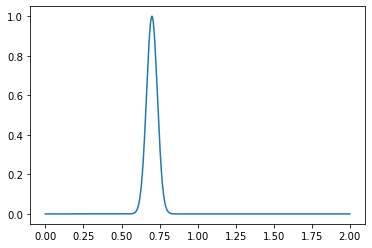

In [43]:
plt.plot(x_i,y_i)

In [53]:
popt, pcov = curve_fit(gaussiana,data['Eneergia in eV'],data['Conteggi'],sigma=data['weights'],absolute_sigma=True)

Text(0, 0.5, 'Counts')

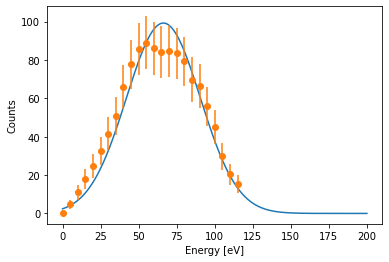

In [58]:
x_i=np.linspace(0,200,num=1000)
#x_i=np.linspace(min,200,num=1000)
y_i=gaussiana(x_i,*popt)
plt.plot(x_i,y_i)

plt.errorbar(data['Eneergia in eV'],data['Conteggi'],yerr=data['weights'],fmt='o')
plt.xlabel('Energy [eV]')
plt.ylabel('Counts')

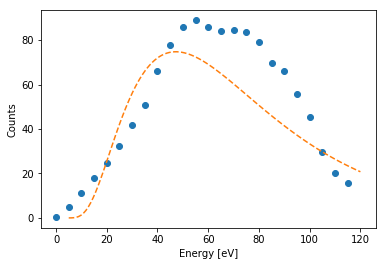

In [46]:
plt.plot(data['Eneergia in eV'],data['Conteggi'],'o')
plt.xlabel('Energy [eV]')
plt.ylabel('Counts')
x = np.linspace(5, 120, 120)
y = _func(x,popt[0],popt[1],popt[2])
plt.plot(x,y,'--')

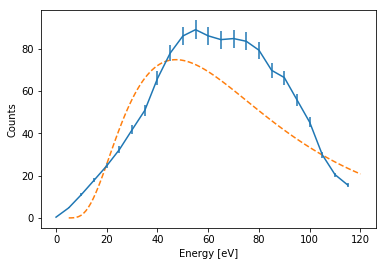

In [35]:
plt.errorbar(data['x'],data['y'],yerr=data['weights'])
plt.xlabel('Energy [eV]')
plt.ylabel('Counts')
x = np.linspace(5, 120, 120)
y = _func(x,popt[0],popt[1],popt[2])
plt.plot(x,y,'--')